## Factors affecting tourism
During our investigation of seasonal tourism trends, we decided to try to understand what factors contribute to a given country's tourism from month to month. To do this, we utilized machine learning techniques to predict the amount of tourism (measured by overnight stays by foreigners) in a given region, using various societal metrics and weather during that month. We then attempted to understand the model after training and interpret the patterns it found.

This involved extracting features from many datasets, each with their own unique quirks and subtleties. The data proved difficult to manage for various reasons:
* Time granularity was not consistent, as the datapoints were collected monthly, quarterly, annually, or per decade depending on the dataset. Our solution was often linear interpolation
* The data was by country, which vary greatly in population, size, and urbanization characteristics. This meant a lot of data had to be normalized, the method of doing so was often a judgment call
* We had one datapoint for each country and month. This meant we didn't have a lot of rows to work with, while we had thousands of columns in metrics, which resulted in overfitting
* The relationships between features proved complex, and difficult to work with and interpret
* The quality of the data was sometimes questionable, especially in smaller countries (damn it Albania). This also means that homoscedasticity could not be assumed
* Most of the data is an estimation done by individual countries, and we suspect that their methods might not be consistent with other nations
* Multicollinearity between features made the interpreting their importance difficult
* Due to the high number of features, runtime for recursive feature selection was extremely expensive

However, we did have a reasonable degree of success, and were able to collect some insights into the factors affecting the seasonal tourism trends.


### Methodology
The predicted variable was the number of overnight stays. The input features were various metrics about the country during that month. In other words, there was 1 datapoint for each country and each month. The features included the following:
* Amount of land used for various purposes, including various agricultural crops and buildings
* The distribution of its citizens in rural and urban areas, by age and gender
* Wealth and income, by age, gender, and degree of urbanization
* Area settled by people
* Education and purchasing power of the citizens, by age and gender
* The proportion of people employed in artistic/cultural professions, such as art, theater, and journalism
* Crime indicators, based on the country's prison population
* The price of goods and services within the country
* Monthly temperature and precipitation

Linear models proved too simple to understand the relationships among the data well, so most of our analysis was based on multilayer perceptions (with ReLU activation, and MSE loss). To understand the importance of the features, we used two methods. One was forward recursive feature selection, where we trained a new model for every unused feature each iteration. Given that we had thousands of features, this became extremely expensive. The other method we used was a variant of permutation importance, where we scrambled a feature to see what impact it had on a trained model's performance. If randomizing the feature did not affect the model's predictions, then we assumed the feature to be unimportant. However, if manipulating the feature caused a massive drop in performance, then we can assume the model consider that feature to be important to its predictions. Performance was mostly measured using MSE and R Squared.


### Prediction Results
For the most popular countries, the predictions were pretty close to the real values. The data provided by large tend to come in greater quality and quantity. Their massive size and population also made them less vulnerable to noise and temporary events, making their data more consistent. This made their tourism trends in these countries easier for models to predict


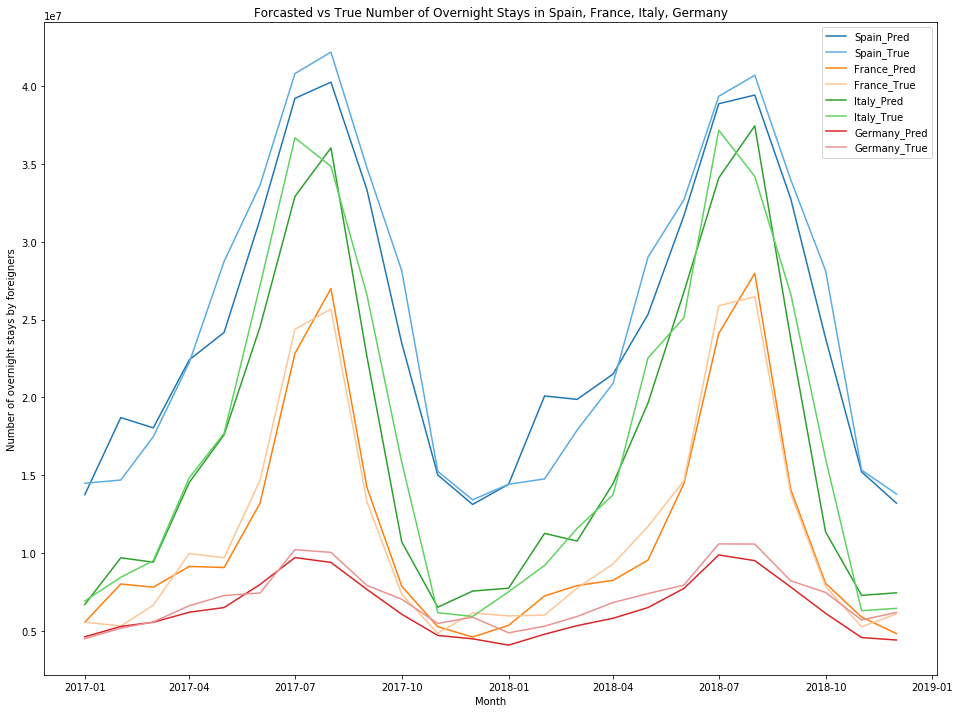

For less popular and smaller countries, the results tend to be somewhat inconsistent. In the graph below, you can see that predictions for Malta and Romania are extremely far from the real values (being around double for Malta)

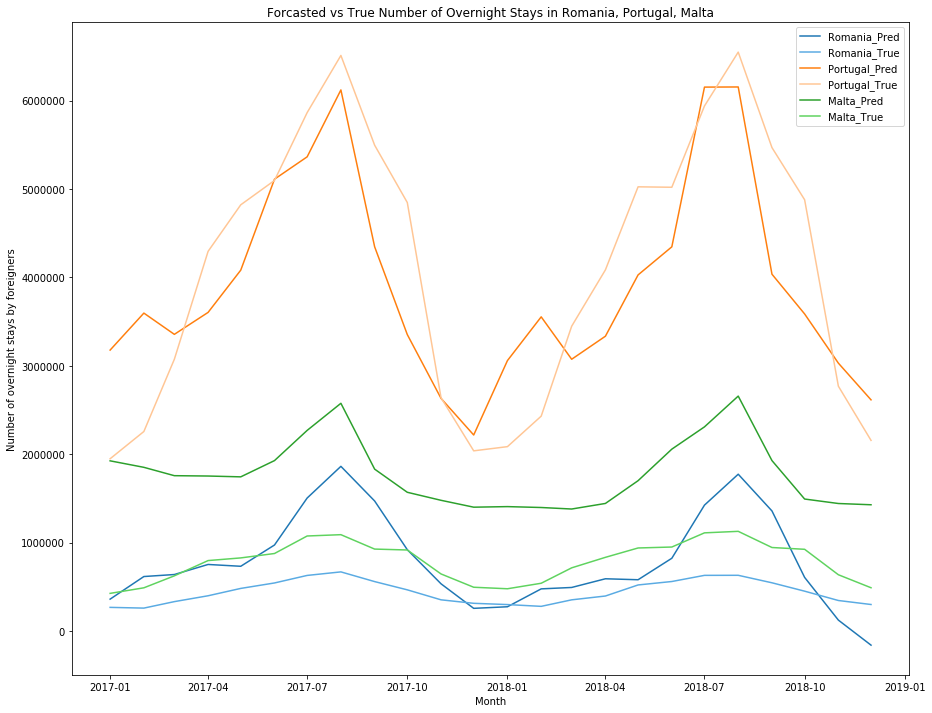

Using forward recursive feature selection, and permutation importance, we were able to gain some insights into what factors contribute to the monthly number of overnight stays in a country. Unfortunately, the nondeterministic nature of neural networks made every run slightly different. As shown below, training the model ten times, and then attempting to predict Sweden's number of overnight stays resulted in very different results each time. While the general trend is reflected, some runs produced predictions that are significantly off the real values.

Another challenge is multicollinearity between features. Sometimes, multiple features reflect an underlying trend, and thus the weight that should be assigned to the underlying trend is assigned to its indicators in an unpredictable manner. 

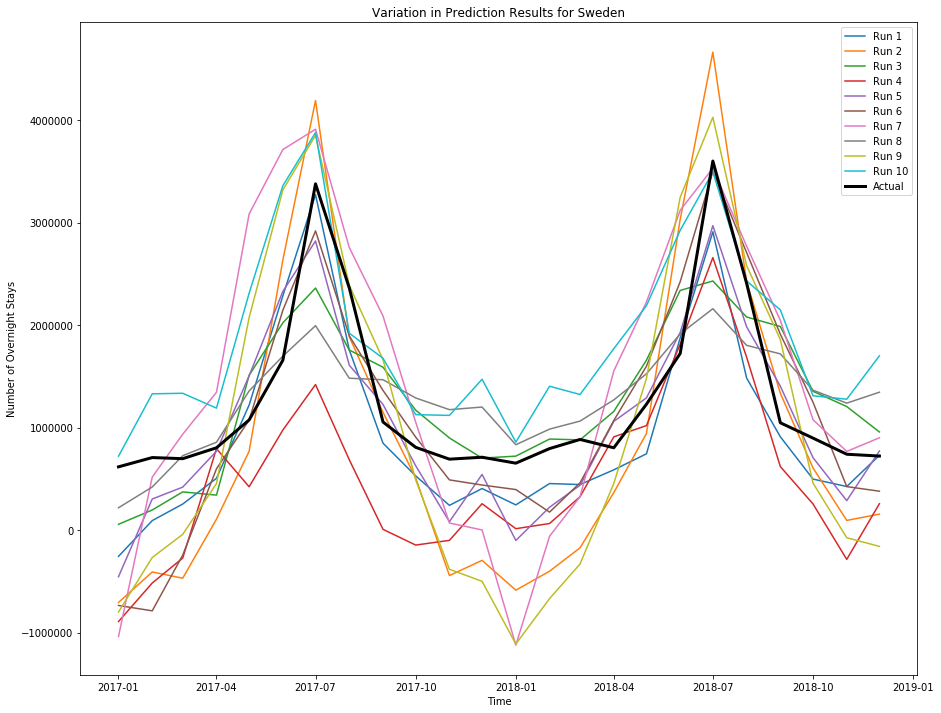

However, on every run, certain patterns immerged

If we had to use just 1 of our features to predict the amount of tourism in a country, this feature would be the amount of land in the country occupied by buildings with more than 3 floors. This feature was selected first by Recursive Feature Selection every time (followed by temperature) and represents the nature of tourism in Europe. A quick Google for "best things to do in Europe", and you'll find that most of the results are for things within major cities - and that's what the tourists seem to come for.

Given all the available features however, the model prioritizes precipitation levels and temperature. Scrambling these features causes the most damage to the model's predictions, and indicates the high impact seasonality has on tourism trends. In general, temperature has a correlation of 0.88 with tourist numbers, while precipitation has -0.85. In other words, high temperatures and low precipitation are primary factors in the attractiveness of a country to tourists (at least in Europe).

The next most important features are the price of tourism-related products, including cultural services, passenger transport via sea or waterway, and accommodation, and holiday packages. However, the correlation of these features with the number of tourists is positive - in other words, the more expensive tourist activities are, the more tourists there are. This positive correlation is strongest with accommodation and holiday packages, with a value of 0.66. This may be because higher quality services are more expensive, or because high demand increased the price.  Whatever the reason is though, it seems high prices are not able to deter tourists from a location.

Some kind of agricultural land cover feature is always considered important by the model. This includes things like amount of land used for apples, oranges, flowers, or even soybean. Unfortunately, the relationships are complex and the reason hard to interpret. Our theory is that they indirectly reflect how much of the land is used in a way that generates tourism, the climate, or the quality of local food.

A high proportion of prisoners plays a small role in determining tourism numbers. A high number of people in bad health within cities also seems to be a minor deterrent to tourism activity, maybe because it presents the country in a bad light.

Interesting enough, many factors that contribute to the well-being of a country's citizens do not affect tourism numbers much. The price of everyday goods and groceries, the education levels of the citizens, the median and mean incomes, and purchasing power seem to play little to no role. It appears that tourists are not particularly concerned about the well-being and wealth of the locals, a trend that may perhaps be better illustrated by the popularity of poor tropical regions like the Caribbean.